In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from ncon import ncon
import scipy.linalg as sla 
from numpy import linalg as LA

In [19]:
def TFI_itebd(J:float,h:float,δ:float,n_iter:int):
    # Hamiltonian definition
    d = 2;
    D = 10;
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])
    Id = np.array([[1,0],[0,1]])
    
    Hzz = ncon([Z,Z],[[-1,-3],[-2,-4]])
    Hx = 0.5*(ncon([Id,X],[[-1,-3],[-2,-4]]) + ncon([X,Id],[[-1,-3],[-2,-4]]))
    H = -J*Hzz - h*Hx
    Hexp = np.reshape(H,[d*d,d*d])
    Ug = sla.expm(-δ*Hexp)
    Ug = np.reshape(Ug,[d,d,d,d])
    M = 0.5*(ncon([Z,Z],[[-1,-3],[-2,-4]]))
    
    # creation of tensors
    ΓA = np.random.rand(D,D,d)
    ΓA = ΓA/LA.norm(ΓA)
    ΓB = np.random.rand(D,D,d)
    ΓB = ΓB/LA.norm(ΓB)  
    Γ = [ΓA,ΓB]
    λA = np.random.rand(D)
    λA = λA/np.linalg.norm(λA)
    λB = np.random.rand(D)
    λB = λB/np.linalg.norm(λB)
    λ = [λA, λB]
    θ = np.random.rand(D,d,d,D)
    tol = 1e-10
    for stp in range(n_iter):
        A = np.mod(stp,2)
        B = np.mod(stp+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B]), Ug]
#         connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,6,-2,-4]] ##
        connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,-2,6,-4]]
#         connect = [[-1,1],[1,2,3],[2,4],[4,5,6],[5,-3],[3,-2,-4,6]]
        order = [1,4,5,2,3,6]
        θ_new = ncon(tensors,connect,order)
        
#         tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
#         connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
#         order = [4,2,1,3]
#         θ_new = ncon(tensors, connect, order)
#         θ_new = ncon([θ_new, Ug], [[-1,1,-3,2],[1,-2,2,-4]])
        θ_new = np.reshape(θ_new,[D*d,D*d])
        θ = np.reshape(θ,[D*d,D*d])
        if LA.norm(θ_new - θ) < tol:
#             print("iter: {}, Success!".format(stp))
            break
        else:
#             print("iter: {}, diff: {}".format(stp, LA.norm(θ_new - θ)))
            θ = θ_new
            U,S,Vd = LA.svd(θ)
            Γ[A] = U[:,0:D]
            Γ[A] = np.reshape(Γ[A],[D,d,D])
            Γ[A] = np.transpose(Γ[A],[0,2,1])
            Γ[B] = Vd[0:D,:]
            Γ[B] = np.reshape(Γ[B], [D,D,d])
            # 
            λ[A] = S[0:D] / LA.norm(S[0:D])
            Γ[A] = ncon([np.diag(1./λ[B]),Γ[A]],[[-1,1],[1,-2,-3]])
            Γ[B] = ncon([Γ[B], np.diag(1./λ[B])],[[-1,1,-3],[1,-2]])
            Γ[A] = Γ[A] / LA.norm(Γ[A])
            Γ[B] = Γ[B] / LA.norm(Γ[B])   
    E = []
    Mag = []
    for j in range(len(Γ)):
        A = np.mod(j,2)
        B = np.mod(j+1,2)
        tensors = [np.diag(λ[B]), Γ[A], np.diag(λ[A]), Γ[B], np.diag(λ[B])]
        connect = [[-1,1],[1,2,-2],[2,3],[3,4,-4],[4,-3]]
        order = [1,4,3,2]
        θ = ncon(tensors,connect,order)
        θ = θ / LA.norm(θ)
#         θ = θ / np.max(np.abs(θ))
#         print(LA.norm(θ))
        Eb = ncon([θ, H, np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4])
#         Eb = ncon([θ, H, np.conj(θ)],[[1,2,3,4],[2,5,4,6],[1,5,3,6]],[5,6,1,2,3,4])
        E.append(Eb)
        Mb = ncon([θ, M, np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4])
#         Mb = ncon([θ, M, np.conj(θ)],[[1,2,3,4],[2,4,5,6],[1,5,3,6]],[5,6,1,2,3,4])
        Mag.append(Mb)
    E_total = np.sum(E)
    M_total = np.sum(Mag)
    E0 = E_total/2 
    Magetization = M_total/2
    
    return E0, Magetization

In [20]:
steps = np.linspace(0,4.7,num=50)
E_Ising = []
M_Ising = []
# TFI_itebd(J:float,h:float,δ:float,d:int,D:int,nᵢ:int) -> float:
for h in steps:
    E_0, M_0 = TFI_itebd(1.0,h,0.001,100)   
    E_Ising.append(E_0)   
    M_Ising.append(M_0)
    

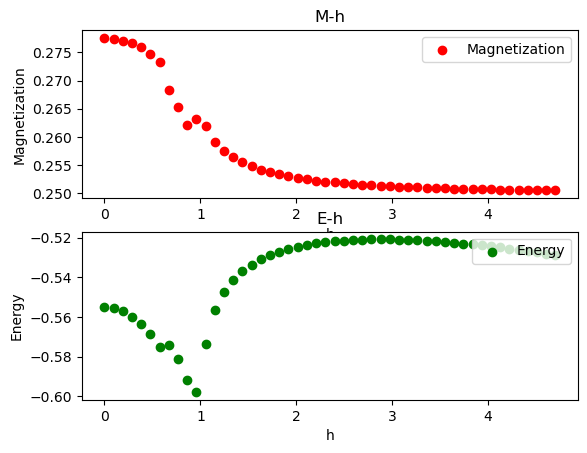

In [21]:

# plt.figure(figsize=(8,10), dpi=1000)
# plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(steps,M_Ising,c='r',label='M')
plt.xlabel("h")
plt.ylabel("Magnetization")
plt.title("M-h")
plt.legend(["Magnetization"],loc="upper right")
plt.margins()
plt.subplot(212)
plt.margins()
plt.scatter(steps,E_Ising,c='g',label='E')
plt.xlabel("h")
plt.ylabel("Energy")
plt.title("E-h")
plt.legend(["Energy"],loc="upper right")
# plt.savefig("Ising_phase_1")
plt.show()